In [48]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

%matplotlib inline


import numpy as np
from numpy.linalg import norm

# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from matplotlib.colors import ListedColormap

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:/Chathurangis/IBM/COVID19-eng/COVID19-eng.csv")
df

,Case identifier number,Region,Episode week,Episode week group,Episode year,Gender,Age group,Occupation,Asymptomatic,Onset week of symptoms,...,"Symptom, pain","Symptom, irritability","Symptom, diarrhea","Symptom, other",Hospital status,Recovered,Recovery week,Recovery year,Death,Transmission
0,1,3,41,0,20,2,3,4,9,41,...,9,9,9,9,3,9,99,99,9,1
1,2,4,31,0,20,2,2,4,2,31,...,9,9,9,9,3,1,33,20,2,1
2,3,2,39,0,20,2,8,4,1,99,...,9,9,9,9,3,1,43,20,2,9
3,4,3,40,0,20,1,2,4,9,40,...,9,9,9,9,9,1,99,99,2,1
4,5,3,42,0,20,2,1,4,9,42,...,9,9,9,9,9,1,99,99,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360231,360232,4,44,0,20,1,1,4,2,44,...,9,9,9,1,3,9,99,99,9,1
360232,360233,2,47,0,20,2,5,4,9,47,...,9,9,9,9,3,9,99,99,9,9
360233,360234,4,99,0,20,1,5,4,2,99,...,1,1,9,1,1,1,29,20,2,2
360234,360235,3,20,0,20,1,4,4,9,20,...,9,9,9,9,9,1,99,99,2,1


In [3]:
# Select the most suitable data for clustering


# 1. Feature subset selection
# Draw a correlation heat map and and removed one of two features that have a correlation higher than 0.9 
# Remove the redundant features and the irrelavant features

# Irrelevant features: Case identifier number
# Redundant features: Episode week group, Onset week of symptoms,Onset year of symptoms,all the 13 symptoms columns
    
# 2. Remove datarows with outliers in all the other columns/ Remove rows with "Not stated" cells 

selected columns Index(['Case identifier number', 'Region', 'Episode week',
       'Episode week group', 'Episode year', 'Gender', 'Age group',
       'Occupation', 'Asymptomatic', 'Onset week of symptoms',
       'Symptom, cough', 'Symptom, fever', 'Symptom, chills',
       'Symptom, sore throat', 'Symptom, runny nose',
       'Symptom, shortness of breath', 'Symptom, nausea', 'Symptom, headache',
       'Symptom, weakness', 'Symptom, pain', 'Symptom, irritability',
       'Symptom, diarrhea', 'Symptom, other', 'Hospital status', 'Recovered',
       'Recovery week', 'Transmission'],
      dtype='object')
No.of selected columns 27


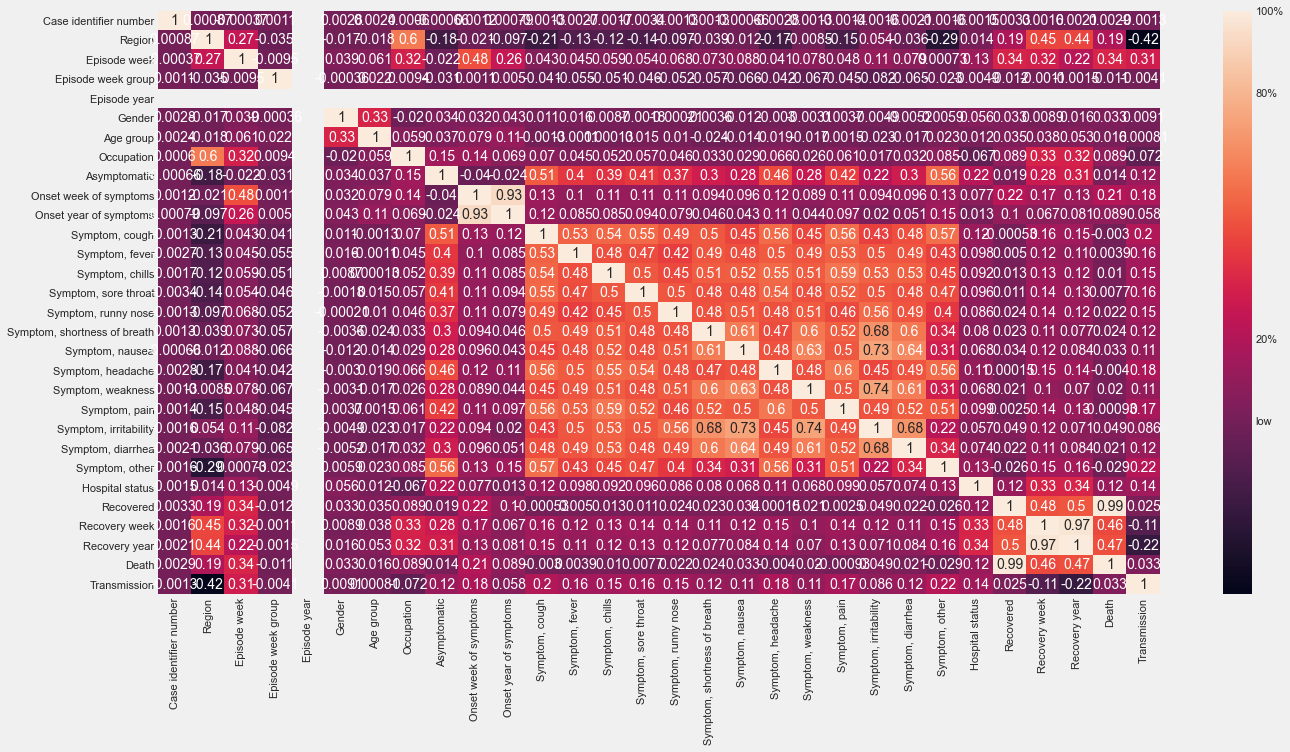

In [9]:
Var_Corr = df.corr()
# print(Var_Corr)

# plot the heatmap and annotation on it
plt.figure(figsize=(20, 10))
ax=sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .2, .8, 1])
cbar.set_ticklabels(['low', '20%', '80%', '100%'])

columns = np.full((Var_Corr.shape[0],), True, dtype=bool)
for i in range(Var_Corr.shape[0]):
    for j in range(i+1, Var_Corr.shape[0]):
        if Var_Corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]
print("selected columns",selected_columns)
print("No.of selected columns",len(selected_columns))

In [10]:
df

,Case identifier number,Region,Episode week,Episode week group,Episode year,Gender,Age group,Occupation,Asymptomatic,Onset week of symptoms,...,"Symptom, headache","Symptom, weakness","Symptom, pain","Symptom, irritability","Symptom, diarrhea","Symptom, other",Hospital status,Recovered,Recovery week,Transmission
0,1,3,41,0,20,2,3,4,9,41,...,9,9,9,9,9,9,3,9,99,1
1,2,4,31,0,20,2,2,4,2,31,...,9,9,9,9,9,9,3,1,33,1
2,3,2,39,0,20,2,8,4,1,99,...,9,9,9,9,9,9,3,1,43,9
3,4,3,40,0,20,1,2,4,9,40,...,9,9,9,9,9,9,9,1,99,1
4,5,3,42,0,20,2,1,4,9,42,...,9,9,9,9,9,9,9,1,99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360231,360232,4,44,0,20,1,1,4,2,44,...,1,9,9,9,9,1,3,9,99,1
360232,360233,2,47,0,20,2,5,4,9,47,...,9,9,9,9,9,9,3,9,99,9
360233,360234,4,99,0,20,1,5,4,2,99,...,1,9,1,1,9,1,1,1,29,2
360234,360235,3,20,0,20,1,4,4,9,20,...,9,9,9,9,9,9,9,1,99,1


Removed columns through correlation analysis are Onset year of symptoms, Recovery year, Death

In [12]:
df=df.drop(['Case identifier number','Episode week group','Onset week of symptoms','Symptom, cough', 'Symptom, fever', 'Symptom, chills', 'Symptom, sore throat','Symptom, runny nose','Symptom, shortness of breath','Symptom, nausea','Symptom, headache','Symptom, weakness','Symptom, pain','Symptom, irritability','Symptom, diarrhea','Symptom, other'],axis=1)
df

,Region,Episode week,Episode year,Gender,Age group,Occupation,Asymptomatic,Hospital status,Recovered,Recovery week,Transmission
0,3,41,20,2,3,4,9,3,9,99,1
1,4,31,20,2,2,4,2,3,1,33,1
2,2,39,20,2,8,4,1,3,1,43,9
3,3,40,20,1,2,4,9,9,1,99,1
4,3,42,20,2,1,4,9,9,1,99,1
...,...,...,...,...,...,...,...,...,...,...,...
360231,4,44,20,1,1,4,2,3,9,99,1
360232,2,47,20,2,5,4,9,3,9,99,9
360233,4,99,20,1,5,4,2,1,1,29,2
360234,3,20,20,1,4,4,9,9,1,99,1


In [15]:
# df[~df['Episode week'].str.contains('99')]
df=df[~df['Episode week'].isin(['99'])]
df=df[~df['Episode year'].isin(['99'])]
df=df[~df['Gender'].isin(['9'])]
df=df[~df['Age group'].isin(['99'])]
df=df[~df['Occupation'].isin(['9'])]
df=df[~df['Asymptomatic'].isin(['9'])]
df=df[~df['Hospital status'].isin(['9'])]
df=df[~df['Recovered'].isin(['99'])]
df=df[~df['Recovery week'].isin(['99'])]
df=df[~df['Transmission'].isin(['9'])]
df

,Region,Episode week,Episode year,Gender,Age group,Occupation,Asymptomatic,Hospital status,Recovered,Recovery week,Transmission
1,4,31,20,2,2,4,2,3,1,33,1
10,4,26,20,2,6,4,2,3,1,28,1
13,4,35,20,2,7,4,2,3,1,37,1
18,4,31,20,2,4,4,2,3,1,33,1
40,4,41,20,1,1,4,2,3,1,45,1
...,...,...,...,...,...,...,...,...,...,...,...
360196,4,45,20,2,7,4,2,3,1,46,1
360199,2,16,20,2,8,4,1,3,1,17,1
360225,4,43,20,1,3,4,2,3,1,45,1
360227,4,44,20,1,3,4,2,3,1,45,1


In [16]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)

In [17]:
# Create a PCA instance: pca
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_std)

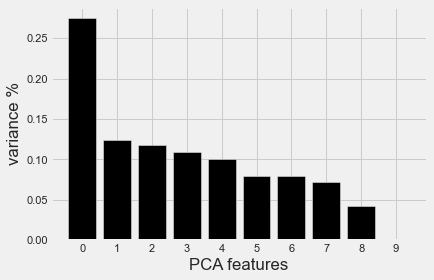

In [18]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 1')

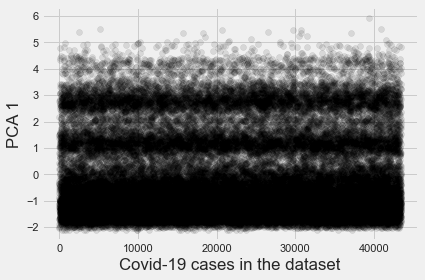

In [19]:
plt.scatter(PCA_components[0].index,PCA_components[0], alpha=.1, color='black')
plt.xlabel('Covid-19 cases in the dataset')
plt.ylabel('PCA 1')

In [20]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global Data_reduced
    Data_reduced = pca.fit_transform(df)
    print('Shape of the new Data df: ' + str(Data_reduced.shape))

In [22]:
pca_transform(n_comp=1)

Shape of the new Data df: (43438, 1)


1 feature seems to be best fit for our algorithm.

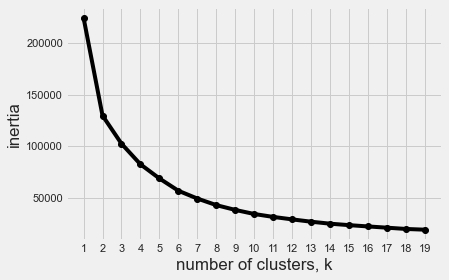

In [23]:
ks = range(1, 20)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [24]:
class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)

Shape of the new Data df: (43438, 1)


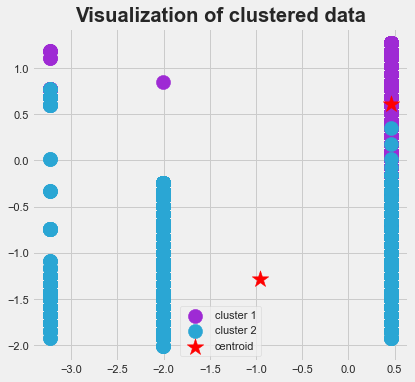

In [25]:
# Run local implementation of kmeans
pca_transform(n_comp=1)
km = Kmeans(n_clusters=2,max_iter=100)
km.fit(X_std)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],marker='o',s=200,
            c='#9E2AD4', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],marker='o',s=200,
            c='#2AA6D4', label='cluster 2')


plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')

plt.legend()
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [30]:
df['Labels']=km.labels
df.head(10)

,Region,Episode week,Episode year,Gender,Age group,Occupation,Asymptomatic,Hospital status,Recovered,Recovery week,Transmission,Labels
1,4,31,20,2,2,4,2,3,1,33,1,0
10,4,26,20,2,6,4,2,3,1,28,1,0
13,4,35,20,2,7,4,2,3,1,37,1,0
18,4,31,20,2,4,4,2,3,1,33,1,0
40,4,41,20,1,1,4,2,3,1,45,1,0
41,4,38,20,2,3,4,1,3,1,40,1,0
43,4,46,20,1,1,4,2,3,1,48,1,0
50,4,17,20,2,1,4,2,3,1,18,1,1
55,4,38,20,1,4,4,2,3,1,39,1,0
64,4,34,20,1,2,4,2,3,1,34,1,0


In [28]:
pd.Series(km.labels).value_counts()

0    29379
1    14059
dtype: int64

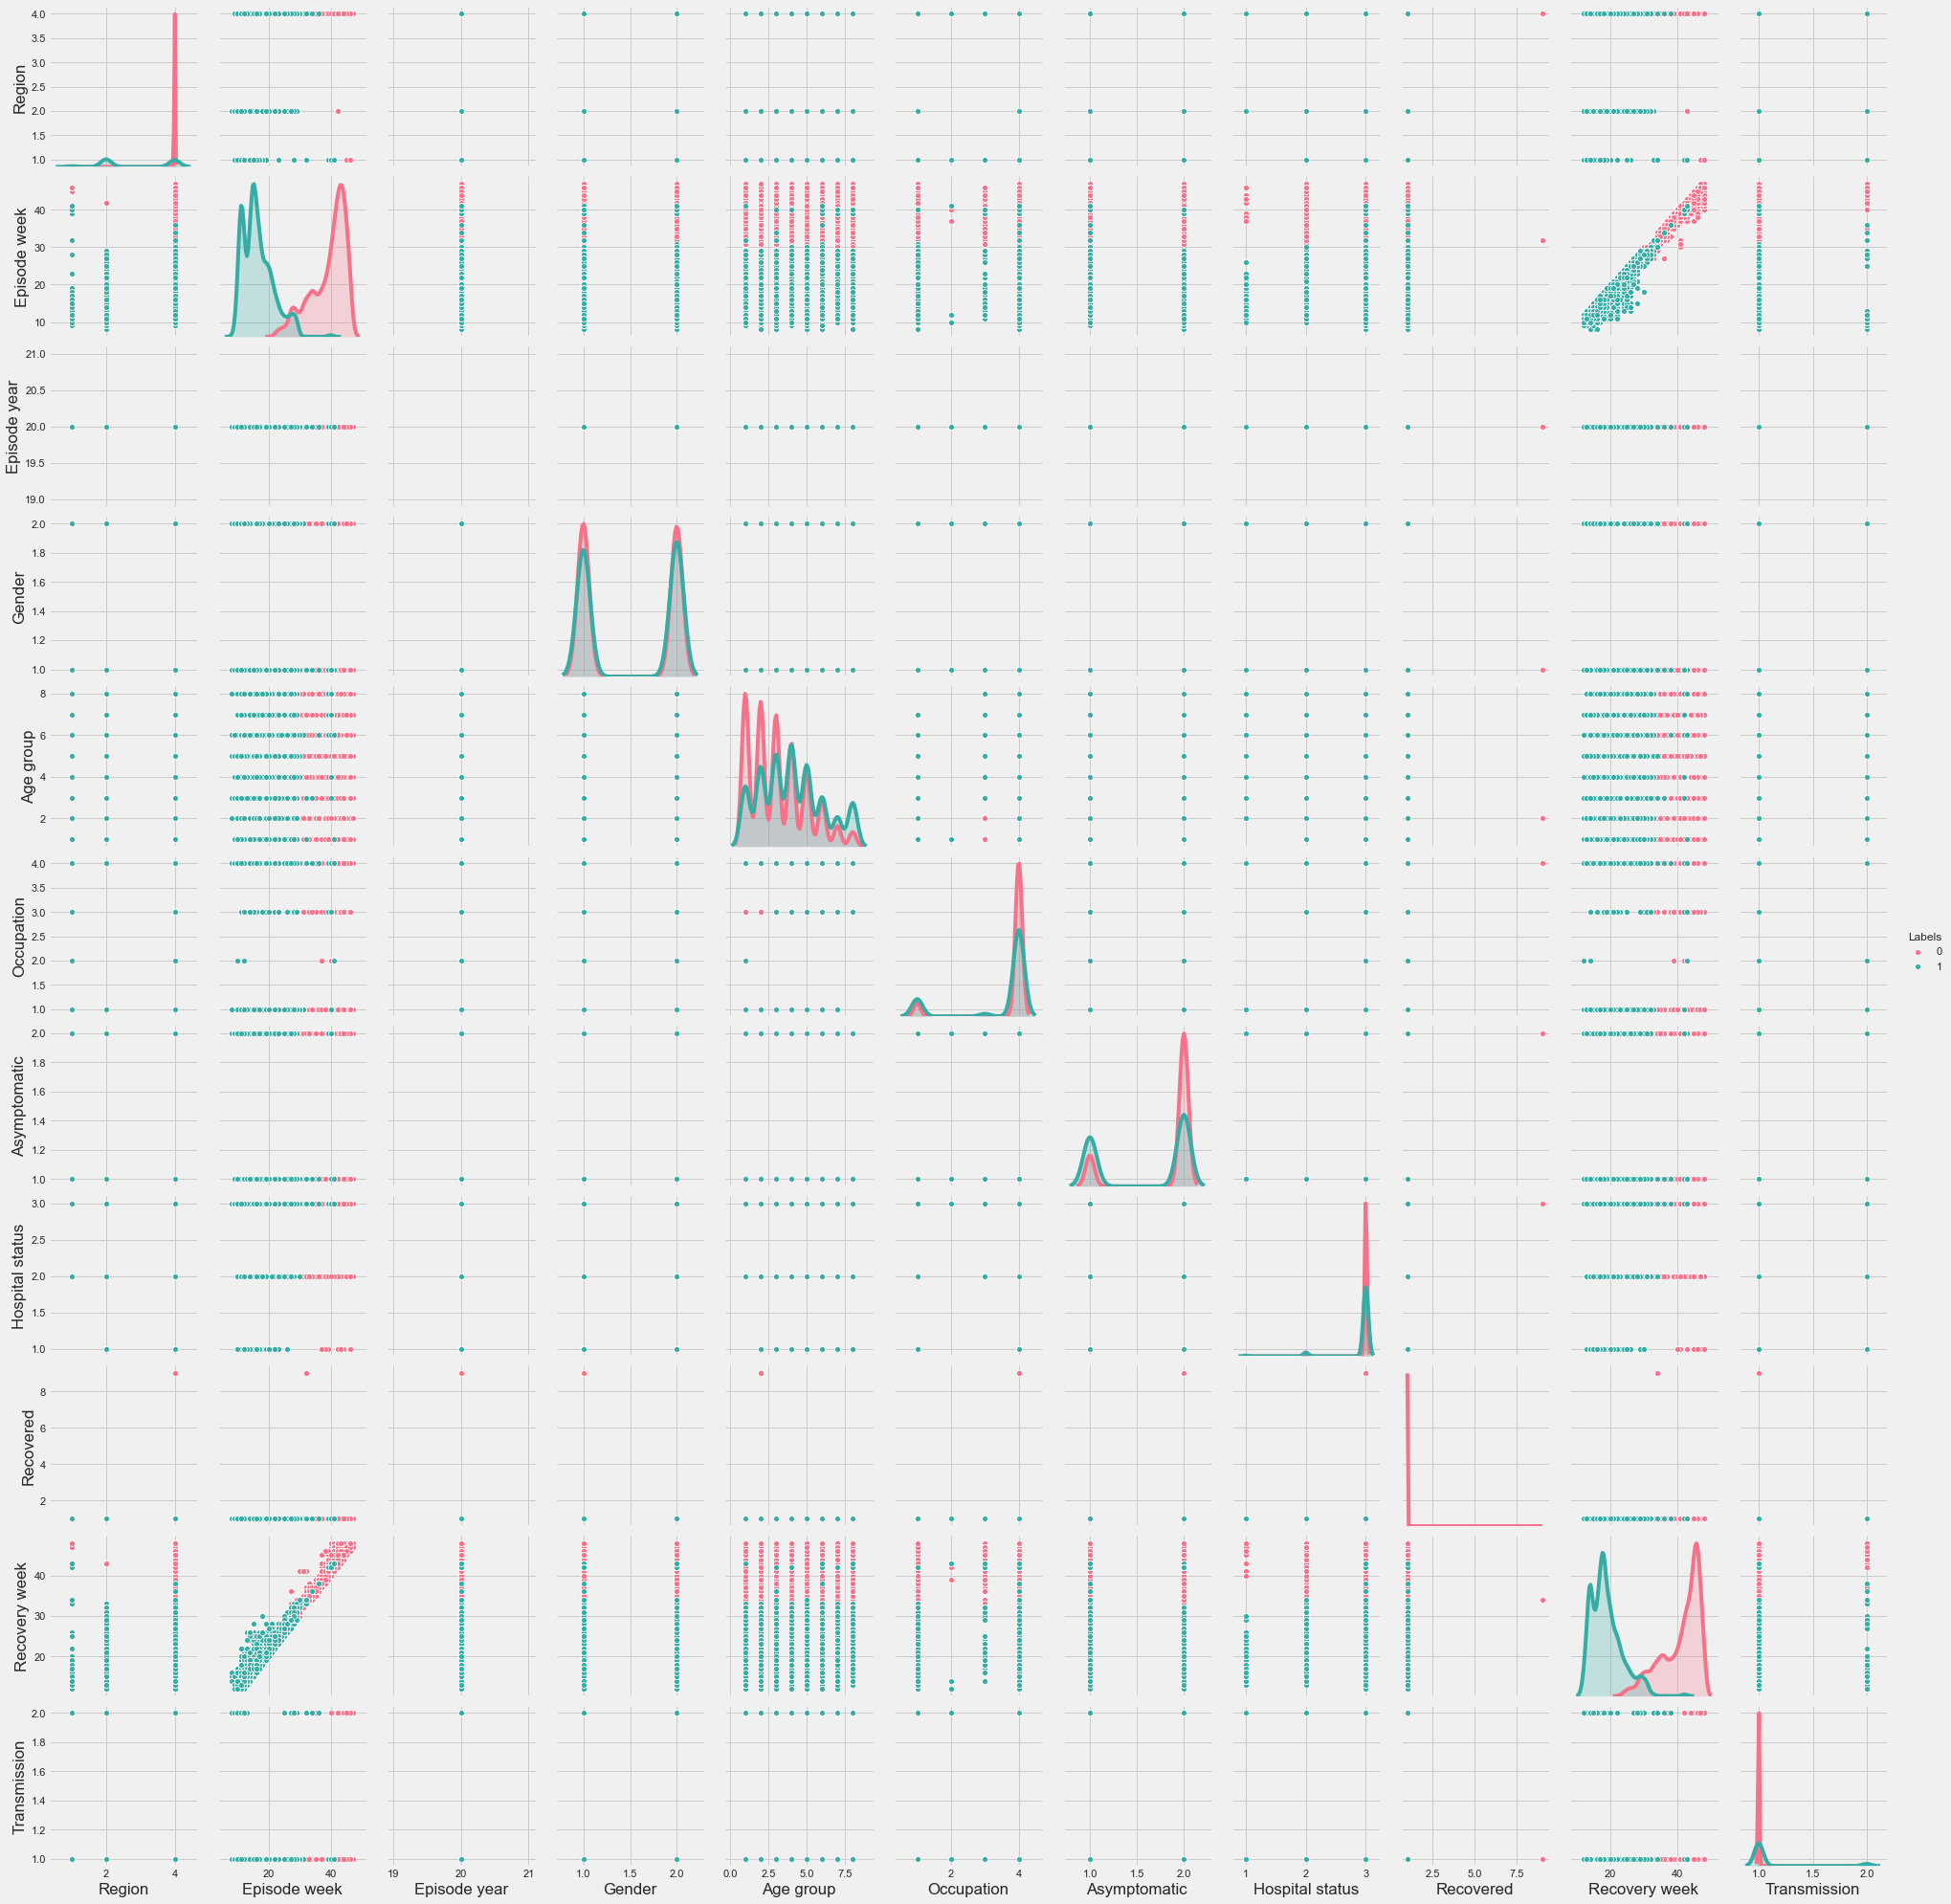

In [32]:
sns.pairplot(df,hue = 'Labels',diag_kind = "kde",kind = "scatter",palette = "husl")

Text(0, 0.5, 'Asymptomatic')

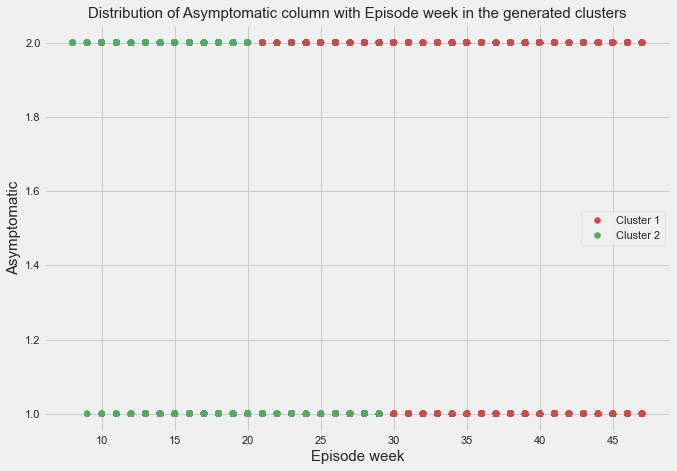

In [50]:
plt.figure(figsize=(10, 7))  
x = df['Episode week']
y = df['Asymptomatic']
classes = ['Cluster 1', 'Cluster 2']
values = km.labels
colours = ListedColormap(['r','g'])
scatter = plt.scatter(x, y,c=values, cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("Distribution of Asymptomatic column with Episode week in the generated clusters",fontsize=15)
plt.xlabel("Episode week",fontsize=15)
plt.ylabel("Asymptomatic",fontsize=15)

Text(0, 0.5, 'Recovery week')

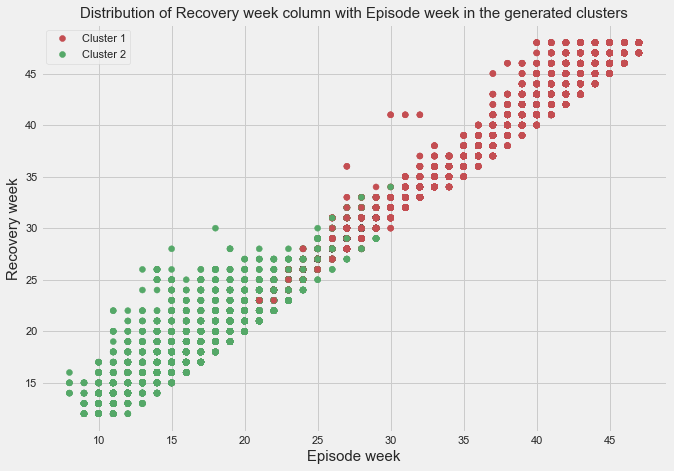

In [55]:
plt.figure(figsize=(10, 7))  
x = df['Episode week']
y = df['Recovery week']
classes = ['Cluster 1', 'Cluster 2']
values = km.labels
colours = ListedColormap(['r','g'])
scatter = plt.scatter(x, y,c=values, cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("Distribution of Recovery week column with Episode week in the generated clusters",fontsize=15)
plt.xlabel("Episode week",fontsize=15)
plt.ylabel("Recovery week",fontsize=15)

Text(0, 0.5, 'Asymptomatic')

<Figure size 720x504 with 0 Axes>

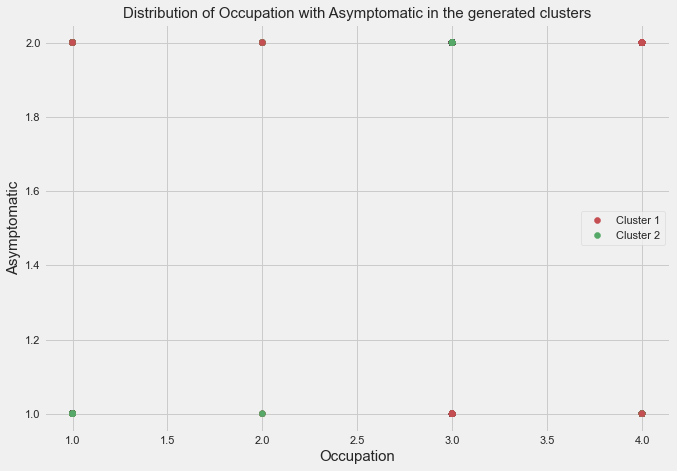

In [54]:
plt.figure(figsize=(10, 7))  
plt.figure(figsize=(10, 7))  
x = df['Occupation']
y = df['Asymptomatic']
classes = ['Cluster 1', 'Cluster 2']
values = km.labels
colours = ListedColormap(['r','g'])
scatter = plt.scatter(x, y,c=values, cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("Distribution of Occupation with Asymptomatic in the generated clusters",fontsize=15)
plt.xlabel("Occupation",fontsize=15)
plt.ylabel("Asymptomatic",fontsize=15)

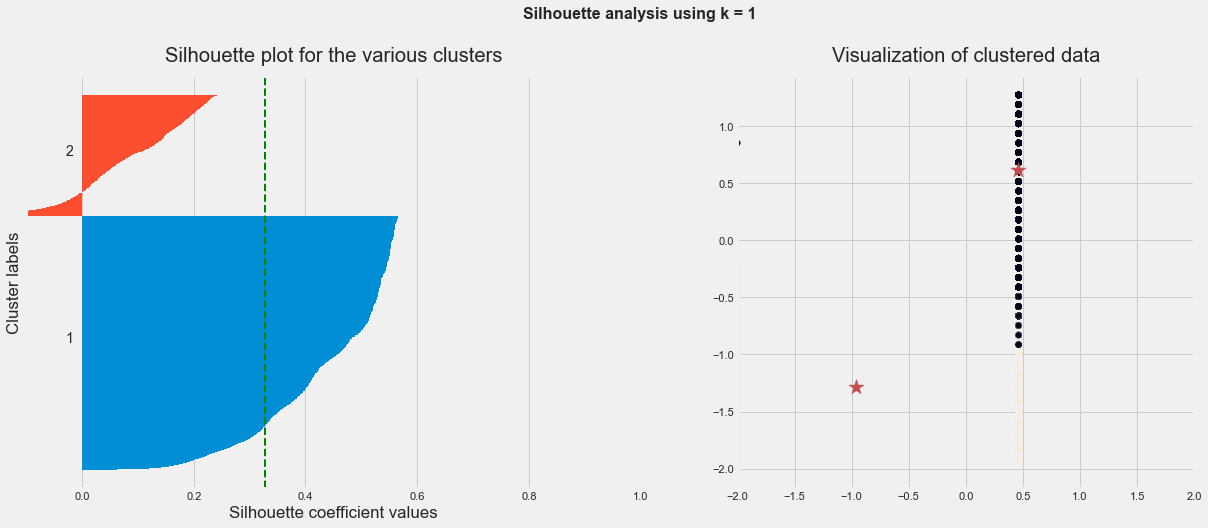

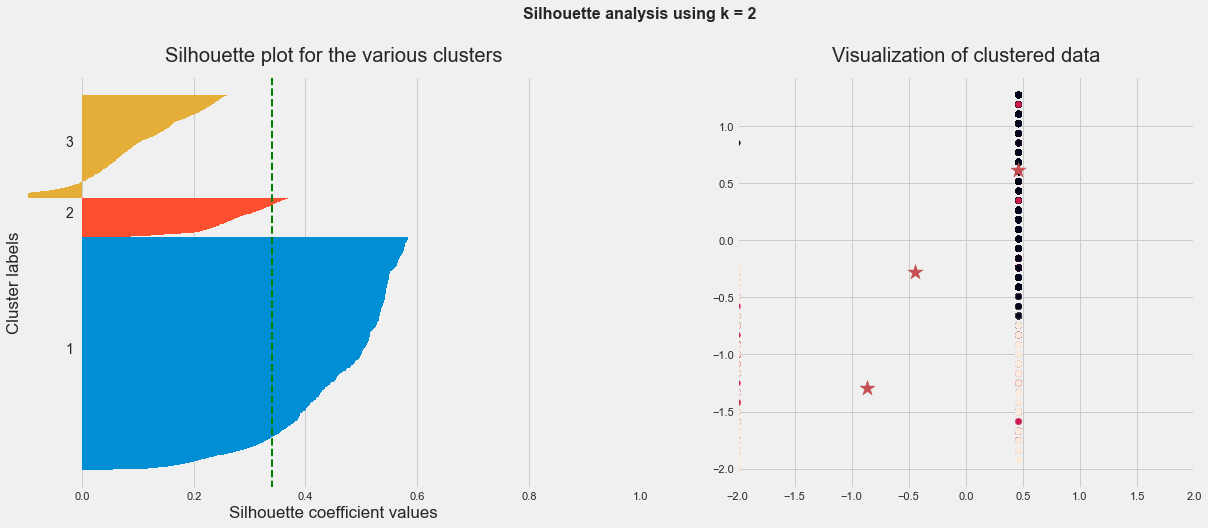

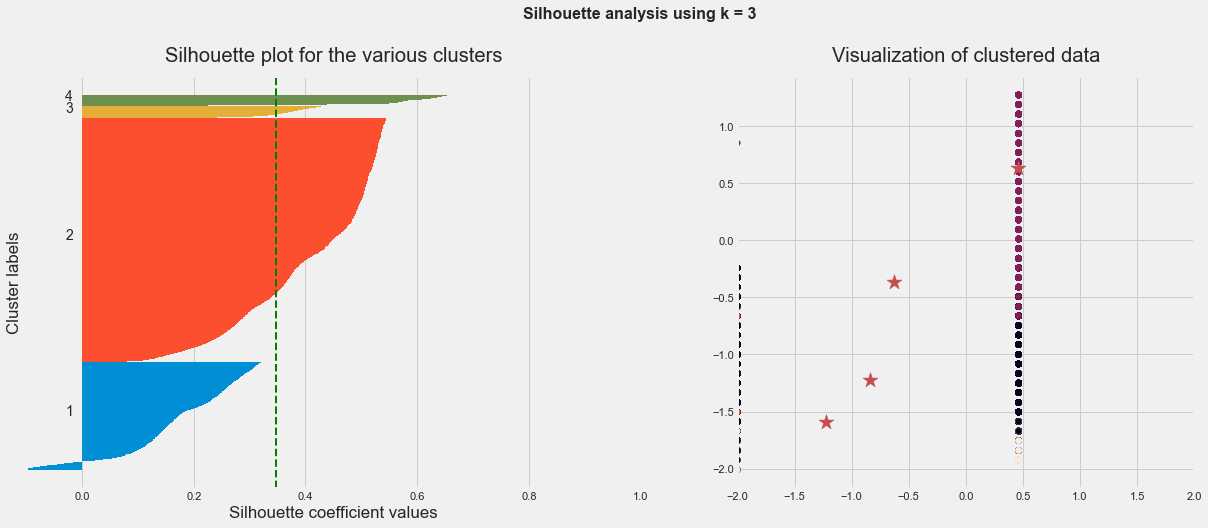

In [62]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    #ax2.set_xlabel('Eruption time in mins')
    #ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k-1}',
                 fontsize=16, fontweight='semibold', y=1.05);